# IS 4487 Assignment 5: Exploratory Data Analysis (EDA) with Stakeholder Framing

In this assignment, you will:
- Load and explore a hotel bookings dataset
- Identify stakeholder needs and frame your analysis around business goals
- Practice data summarization and visualization
- Draw insights that could lead to actionable business recommendations

## Why This Matters

These skills are essential for business majors and minors working in areas like marketing, operations, finance, or consulting. Understanding how to explore and communicate data-driven insights helps you make better decisions and contribute to real-world business outcomes.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_5_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Setup and Data Loading

Instructions:
- Import `pandas`, `seaborn`, and `matplotlib.pyplot`.
- Load the dataset from this URL:
  https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv
- Display the first few rows to confirm it loaded correctly.


In [2]:
# Your code to import libraries and load data goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a5data='https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv'
df = pd.read_csv(a5data)
# view first few lines of the data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Stakeholder and Business Context

Business framing:  

Every analysis should serve a decision-maker. Before you explore the data, identify who cares about hotel booking behavior and what they might want to know. Your analysis should be framed around those needs.

### In your markdown:
1. Who are the key stakeholders for this dataset?
2. What goals might each stakeholder have?
3. What is a clear, specific business problem statement that this data can help answer?





### ✍️ Your Response:
1. The managers and directors of the hotel are the key stakeholders for this dataset, with them consuming the knowledge the dataset identifies, to then turn into action with hiring, events, and other needs the hotel will have based on the predicted booking behavior. Along with the stakeholders of the people who put together the dataset with their observations of information.

2. The goals of the stakeholders are to maximize their profits and ensure the hotel runs properly and legally. As well as, the creators of the dataset want to ensure their goals of having a accurate dataset are true.

3. The hotel is only being booked during a couple months of the year, risking losing profits and going negative in the other months.




## 3. Explore Data Structure and Quality

Business framing:  

Before diving into analysis, analysts need to understand the shape and health of the data. Bad data leads to bad decisions.

- Use at least 3 techniques to examine structure and quality:
  - Summary info (e.g., `.info()`, `.describe()`)
  - missing/null value checks
  - Duplicate row checks
   - outliers
- Flag any issues you notice (e.g., missing values, formatting problems)

### In your markdown:
1. What structural issues or problems did you find?
2. What actions would you recommend to clean or prepare this dataset for use?



In [8]:
# Identify outliers using IQR for 'adr' (Average Daily Rate)
Q1 = df['adr'].quantile(0.10)
Q3 = df['adr'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['adr'] < lower_bound) | (df['adr'] > upper_bound)]

print(f"Number of outliers in 'adr': {len(outliers)}")
print("Outlier rows in 'adr':")
display(outliers)

Number of outliers in 'adr': 86
Outlier rows in 'adr':


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
7419,Resort Hotel,1,13,2016,August,33,8,1,3,3,...,No Deposit,240.0,NaN,0,Transient,369.00,0,0,Canceled,2016-07-27
9727,Resort Hotel,1,31,2016,December,53,30,0,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,340.00,0,1,Canceled,2016-12-30
9728,Resort Hotel,1,95,2016,December,53,30,0,2,2,...,No Deposit,240.0,NaN,0,Transient,384.00,0,0,Canceled,2016-09-26
9768,Resort Hotel,1,319,2016,December,53,31,0,1,2,...,No Deposit,240.0,NaN,0,Transient,382.00,0,0,Canceled,2016-02-22
12785,Resort Hotel,1,25,2017,July,29,17,1,1,2,...,No Deposit,240.0,NaN,0,Transient,338.00,0,1,Canceled,2017-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,NaN,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
110141,City Hotel,0,3,2017,April,16,22,0,1,2,...,No Deposit,9.0,NaN,0,Transient,336.00,1,1,Check-Out,2017-04-23
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,NaN,0,Transient,510.00,0,0,Check-Out,2017-05-10
115541,City Hotel,0,24,2017,July,27,2,2,3,2,...,No Deposit,14.0,NaN,0,Transient,338.00,0,0,Check-Out,2017-07-07


In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 31994


In [5]:
print(df.isnull().sum())

Missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
# Add your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### ✍️ Your Response:
1. There are a lot of duplicates, along with a few outliers in the dataset, and the company and agent columns are missing a lot of data compared to other columns.

2. Manually identifying the causes of why so many duplicates and outliers are present in the dataset, and see if there is an explanation. If not clean the duplicates, delete outliers, and identify why there are so many null values for company and agent columns.



## 4. Univariate Analysis

Business framing:  

Hotels care about trends like average stay length, customer mix, and pricing. A good EDA starts with understanding single variables and their distribution.

- Select at least 3 individual variables to explore
- Use plots and summaries to describe the distribution
- Focus on what matters from a business standpoint (e.g., pricing, cancellations, guest types)

### In your markdown:
1. Variable 1 – What did you explore and what did you find?
2. Variable 2 – What did you explore and what did you find?
3. Variable 3 – What did you explore and what did you find?




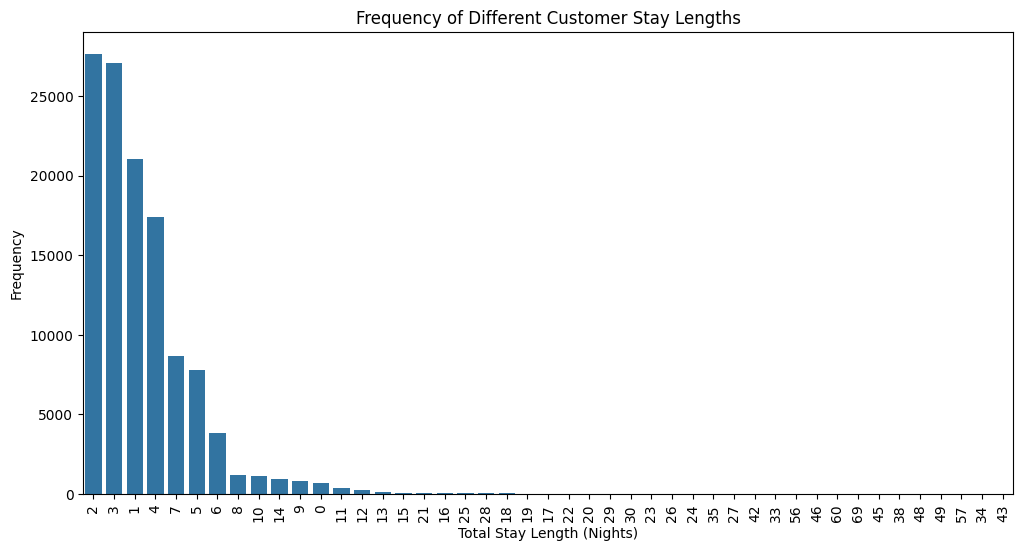

In [13]:
# Create a bar chart for the frequency of different customer stay lengths
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='total_stay', order=df['total_stay'].value_counts().index)
plt.title('Frequency of Different Customer Stay Lengths')
plt.xlabel('Total Stay Length (Nights)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

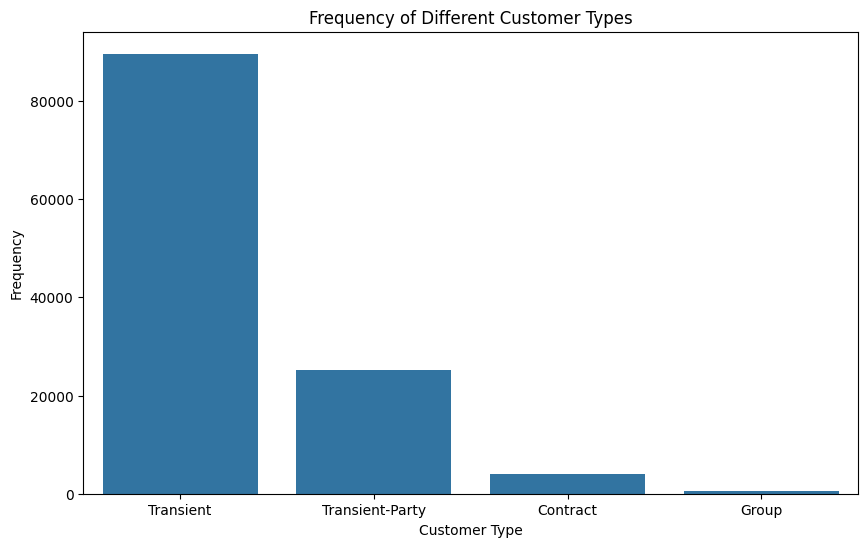

In [14]:
# Create a bar chart for the frequency of different customer types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_type', order=df['customer_type'].value_counts().index)
plt.title('Frequency of Different Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.show()

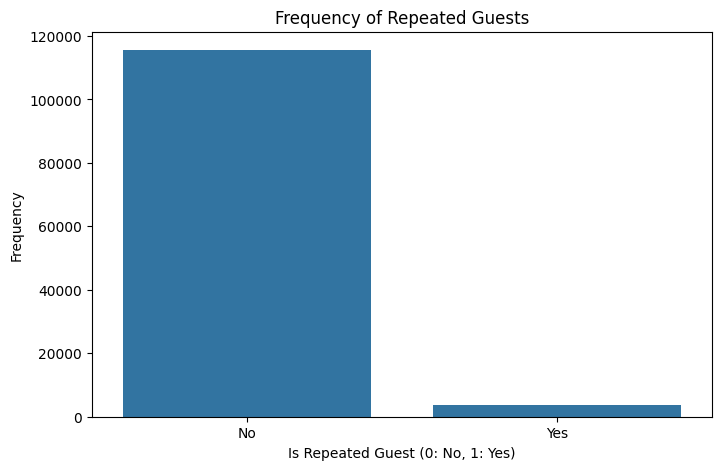

In [15]:
# Create a bar chart for the frequency of repeated guests
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_repeated_guest')
plt.title('Frequency of Repeated Guests')
plt.xlabel('Is Repeated Guest (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### ✍️ Your Response:
- **Variable 1 – Summary and insights:**  Identifying the count of nights people stay and which amount of nights are the most common. Between 1-4 nights being stayed at the hotel is the average. Therefore, this hotel is used for short trips in and out of this location.
- **Variable 2 – Summary and insights:**  Identifying the different customer types and who stays at the hotel more frequentely. The transient customer type stays there the most, the short stay person, and that is who should be targeted for marketing because of the difference in amounts compared to other customer types.
- **Variable 3 – Summary and insights:**  The returning versus non-returning guests shows insight on the crowd that attends. This hotel usually only has travellers come once and not again, so targeting on new customers is imporant.


## 5. Bivariate Analysis

Business framing:  

Stakeholders often ask: “What drives cancellations?” or “Do longer stays mean higher revenue?” Bivariate analysis helps you uncover those kinds of relationships.

- Choose 2 relevant variable pairs (e.g., `lead_time` vs. `is_canceled`, or `adr` vs. `customer_type`)
- Use scatterplots, grouped bar plots, or boxplots to explore the relationships
- Interpret what these relationships could mean for the hotel business

### In your markdown:
1. Relationship 1 – What did you analyze and what insights did you find?
2. Relationship 2 – What did you analyze and what insights did you find?



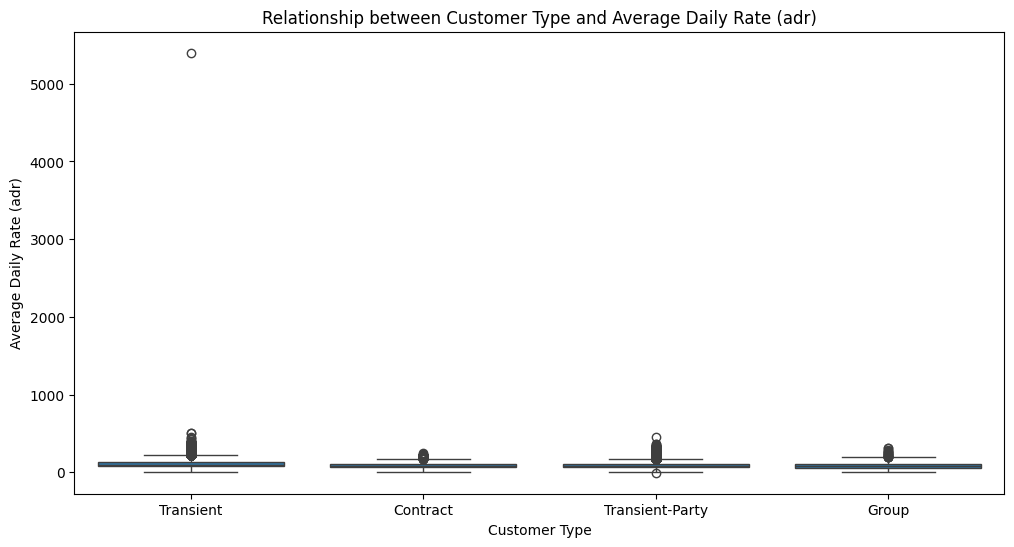

In [17]:
# Create a boxplot to show the relationship between customer type and adr
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='customer_type', y='adr')
plt.title('Relationship between Customer Type and Average Daily Rate (adr)')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (adr)')
plt.show()

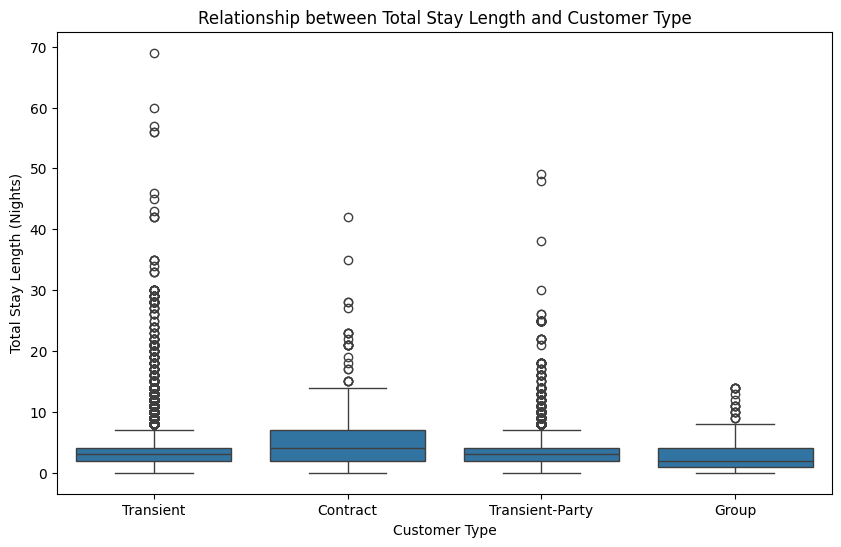

In [10]:
# Create a boxplot to show the relationship between total stay length and customer type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_type', y='total_stay')
plt.title('Relationship between Total Stay Length and Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Stay Length (Nights)')
plt.show()

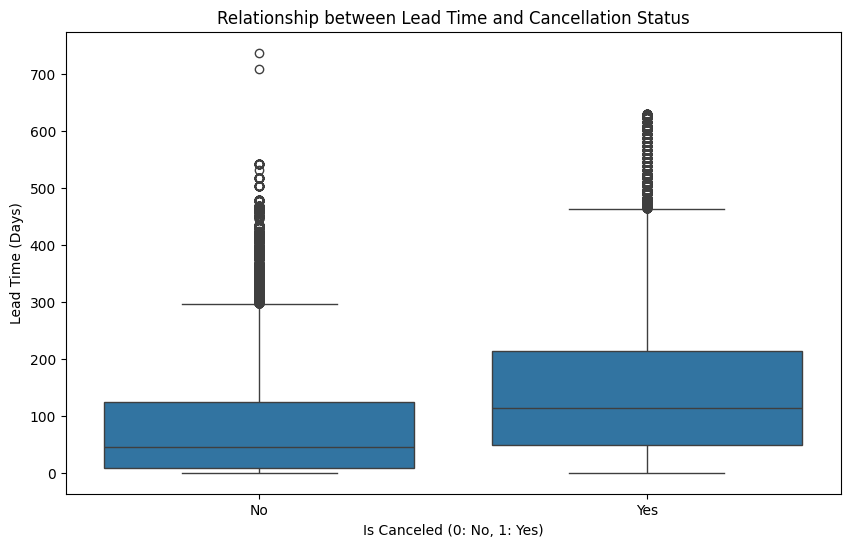

In [19]:
# Create a boxplot for lead time vs is_canceled
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Relationship between Lead Time and Cancellation Status')
plt.xlabel('Is Canceled (0: No, 1: Yes)')
plt.ylabel('Lead Time (Days)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

### ✍️ Your Response:
- **Relationship 1:**  The variables I chose to explore was the type of customer compared to the average stay length. The contract customer which means someone working under a contract and staying for a certain amount of time, has the longest average stay time. Having more contractors stay in the hotel is beneficial for occupancy and reaching out to companies to offer discounts to incentivize those customer types on staying.
- **Relationship 2:**  The second boxplot illustrates the lead time is usually larger for customers that tend to cancel their hotel reservation. Indicating that there may be a relation between the lead time and the time of cancellation, showing a longer lead time could have a higher possibility of canceling the hotel reservation.


## 6. Problem Complexity and Analytics Framing

Business framing:  

Let’s say you found a strong trend — maybe high lead times predict cancellations, or certain channels bring repeat guests. What kind of problem is this?

- Choose one insight from your earlier analysis
- Reflect on:
  - What type of complexity this problem represents (e.g., variety, volume, variability)
  - What kind of analytics would help solve or explain it (descriptive, diagnostic, predictive, prescriptive)

### In your markdown:
1. What was your selected insight?
2. What kind of complexity does it involve?
3. What type of analytics would help, and why?



### ✍️ Your Response:
1. The transient customer type is the most marketable and highest frequency customer.
2. The complexity is not very intense, with understanding the marketing needs for targeting short and new travellers being a key factor, therefore; not having much complexity.
3. Analytics to identify the demographics or geographics of the transient customers to further market and show the target audience to gain business.



## 7. Final Takeaways and Recommendations

Business framing:  

Imagine you’re preparing for a stakeholder meeting. What would you highlight from your findings?

- Identify your top 2–3 insights or patterns
- Connect each to a stakeholder need or business goal
- Make one recommendation based on the analysis

### In your markdown:
1. What patterns or trends stood out?
2. How do they connect to stakeholder goals?
3. What recommendation would you make based on this analysis?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response:

1. High lead times lead to cancellations.
  * The stakeholder need of the hotel manager
being able to identify high risk for cancellation customers helps their planning for the hotels accomadations.
* Make more specific questions about how likely customers are to cancel their reservation and possibly change cancellation rules and dates to decentivize cancellation.
2. Transient customers are the most freqent and profitable customers.
* The stakeholders goals of identifying profitable customers is achieved with this by identifying where the most profit can be made.
* Targeting younger, higher class, and frequent travellers in marketing to provide more content to the target audience to capture more market.




1. The high lead times and cancellation relation stood out.

2. They connect to stakeholders goals by identifying high risk customers to hotel managers to plan accordingly.

3. Make more specific questions about how likely customers are to cancel their reservation and possibly change cancellation rules and dates to decentivize cancellation.

4. This relates to my customized learning outcomes by increasing my critical thinking skills to identify different relations and trends between unlikely variables.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_05_LastnameFirstname.ipynb"